In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

x, y, w = make_regression(n_samples=100, n_features=10, n_informative=8, coef=True, random_state=1)

print("true coefficients: ", w, "\n")

true coefficients:  [38.32634568 88.49665188  0.         29.75747153  0.         19.08699432
 25.44381023 38.69892343 49.28808734 71.75949622] 



In [37]:
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

In [38]:
alphas = np.logspace(-3, 4, 200)
coefs = []
errors_coefs = []

for a in alphas:
    clf.set_params(alpha=a).fit(x, y)
    coefs.append(clf.coef_)
    errors_coefs.append(mean_squared_error(clf.coef_, w))

In [39]:
len(coefs)

200

In [40]:
alphas = pd.Index(alphas, name="alpha")
coefs = pd.DataFrame(coefs, index=alphas, columns=[f"Feature {i}" for i in range(10)])

In [41]:
errors = pd.Series(errors_coefs, index=alphas, name="Mean squared error")

In [42]:
type(coefs)

pandas.core.frame.DataFrame

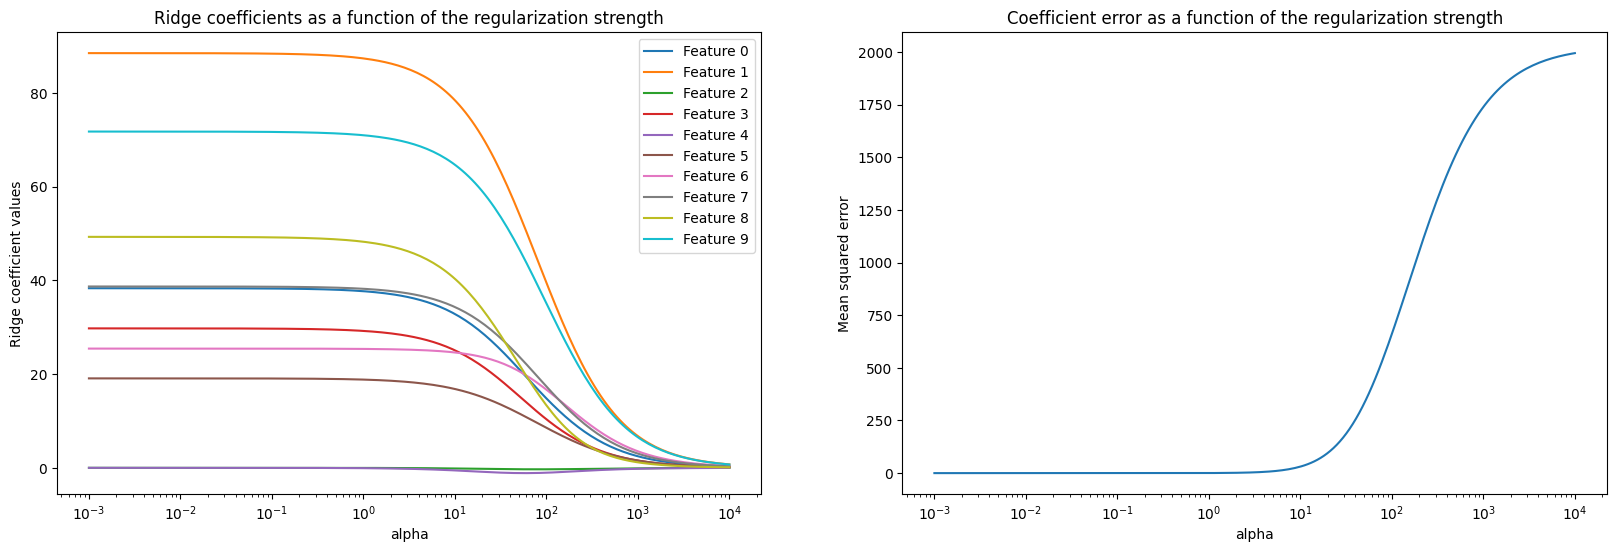

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
coefs.plot(
    ax=axs[0],
    logx=True,
    title="ridge coefficients as a function of the regularization strength",
)
axs[0].set_ylabel("ridge coefficient values")
errors.plot(
    ax=axs[1],
    logx=True,
    title="Coefficient error as a function of the regularization strength",
)
_ = axs[1].set_ylabel("Mean squared error")